# Load Libraries

In [1]:
import os

import pandas as pd
import numpy as np

import huggingface_hub
import datasets

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from datetime import datetime, timezone

import plotly
import plotly.express as px
import plotly.graph_objects as go

plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Create the directory for plots
directory = "./plots"
if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Set colours
colors = ["#FF9D00", "#FFD21E", "#FF323D", "#32343D", "#297373", "#CD4631"]

ORANGE = "#FF9D00"
YELLOW = "#FFD21E"
RED = "#FF323D"
BLACK = "#32343D"
GREEN = "#297373"
DARK_ORANGE = "#CD4631"

# Data Loading and Preprocessing

## Load V2

In [5]:
# Load the v2 JSONL file
ds = datasets.load_dataset("open-llm-leaderboard/contents", split="train")
data_v2 = ds.to_pandas()
data_v2.shape

(203, 32)

In [6]:
data_v2.head()

eval_name Precision  \
0                   upstage_SOLAR-10.7B-v1.0_float16   float16   
1          upstage_SOLAR-10.7B-Instruct-v1.0_float16   float16   
2  togethercomputer_RedPajama-INCITE-Instruct-3B-...   float16   
3  togethercomputer_RedPajama-INCITE-Chat-3B-v1_f...   float16   
4  togethercomputer_RedPajama-INCITE-Base-3B-v1_f...   float16   

                                       Type  T Weight type  \
0                              🟢 pretrained  🟢    Original   
1       💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
2  🔶 fine-tuned on domain-specific datasets  🔶    Original   
3  🔶 fine-tuned on domain-specific datasets  🔶    Original   
4                              🟢 pretrained  🟢    Original   

         Architecture                                              Model  \
0    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
1    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
2  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
3  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
4  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   

                                           fullname  \
0                          upstage/SOLAR-10.7B-v1.0   
1                 upstage/SOLAR-10.7B-Instruct-v1.0   
2  togethercomputer/RedPajama-INCITE-Instruct-3B-v1   
3      togethercomputer/RedPajama-INCITE-Chat-3B-v1   
4      togethercomputer/RedPajama-INCITE-Base-3B-v1   

                                  Model sha  Average ⬆️   Hub License  Hub ❤️  \
0  a45090b8e56bdc2b8e32e46b3cd782fc0bea1fa5   17.072003    apache-2.0     248   
1  c08c25ed66414a878fe0401a3596d536c083606c   19.961989  cc-by-nc-4.0     592   
2  0c66778ee09a036886741707733620b91057909a    5.877290    apache-2.0      91   
3  f0e0995eba801096ed04cb87931d96a8316871af    4.950649    apache-2.0     147   
4  094fbdd0c911feb485ce55de1952ab2e75277e1e    5.645099    apache-2.0      90   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0           10                  True    True  True    False   
1           10                  True    True  True    False   
2            3                  True    True  True    False   
3            3                  True    True  True    False   
4            3                  True    True  True    False   

                   date  Chat Template  IFEval Raw     IFEval   BBH Raw  \
0  2024-06-12T12:27:42Z          False    0.242126  24.212645  0.509387   
1  2024-06-12T12:06:58Z           True    0.473661  47.366100  0.516249   
2  2024-06-12T12:07:46Z          False    0.212426  21.242636  0.314602   
3  2024-06-13T17:58:59Z          False    0.165215  16.521496  0.321669   
4  2024-06-12T12:28:23Z          False    0.229363  22.936254  0.306040   

         BBH  MATH Lvl 5 Raw  MATH Lvl 5  GPQA Raw      GPQA  MUSR Raw  \
0  29.789358        0.021148    2.114804  0.281040  4.138702  0.437156   
1  31.872402        0.000000    0.000000  0.308725  7.829978  0.389937   
2   4.510786        0.006042    0.604230  0.247483  0.000000  0.388604   
3   5.164728        0.003021    0.302115  0.244128  0.000000  0.368448   
4   3.518608        0.009063    0.906344  0.243289  0.000000  0.373875   

        MUSR  MMLU-PRO Raw   MMLU-PRO  Maintainer's Highlight  
0  13.677865      0.340010  26.667775                    True  
1   6.942188      0.313830  23.758865                    True  
2   6.408854      0.110954   1.217125                    True  
3   5.089323      0.112699   1.411052                    True  
4   4.001042      0.111120   1.235594                    True

In [7]:
# Display V2 columns
columns_v2 = data_v2.columns
print(f"V2 columns: {columns_v2}")

V2 columns: Index(['eval_name', 'Precision', 'Type', 'T', 'Weight type', 'Architecture',
       'Model', 'fullname', 'Model sha', 'Average ⬆️', 'Hub License', 'Hub ❤️',
       '#Params (B)', 'Available on the hub', 'Merged', 'MoE', 'Flagged',
       'date', 'Chat Template', 'IFEval Raw', 'IFEval', 'BBH Raw', 'BBH',
       'MATH Lvl 5 Raw', 'MATH Lvl 5', 'GPQA Raw', 'GPQA', 'MUSR Raw', 'MUSR',
       'MMLU-PRO Raw', 'MMLU-PRO', 'Maintainer's Highlight'],
      dtype='object')


## Define V2 Tasks

In [8]:
tasks_v2 = ['IFEval', 'BBH', 'MATH Lvl 5', 'GPQA', 'MUSR', 'MMLU-PRO']
tasks_v2_raw = ['IFEval Raw', 'BBH Raw', 'MATH Lvl 5 Raw', 'GPQA Raw', 'MUSR Raw', 'MMLU-PRO Raw']

## Add Models Creation Date

In [9]:
# version 2
for i, row in data_v2.iterrows():
    data_v2.at[i, 'date'] = huggingface_hub.model_info(row['fullname']).created_at

In [10]:
data_v2.head(2)

eval_name Precision  \
0           upstage_SOLAR-10.7B-v1.0_float16   float16   
1  upstage_SOLAR-10.7B-Instruct-v1.0_float16   float16   

                                  Type  T Weight type      Architecture  \
0                         🟢 pretrained  🟢    Original  LlamaForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  LlamaForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   

                            fullname  \
0           upstage/SOLAR-10.7B-v1.0   
1  upstage/SOLAR-10.7B-Instruct-v1.0   

                                  Model sha  Average ⬆️   Hub License  Hub ❤️  \
0  a45090b8e56bdc2b8e32e46b3cd782fc0bea1fa5   17.072003    apache-2.0     248   
1  c08c25ed66414a878fe0401a3596d536c083606c   19.961989  cc-by-nc-4.0     592   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0           10                  True    True  True    False   
1           10                  True    True  True    False   

                        date  Chat Template  IFEval Raw     IFEval   BBH Raw  \
0  2023-12-12 14:57:41+00:00          False    0.242126  24.212645  0.509387   
1  2023-12-12 12:39:22+00:00           True    0.473661  47.366100  0.516249   

         BBH  MATH Lvl 5 Raw  MATH Lvl 5  GPQA Raw      GPQA  MUSR Raw  \
0  29.789358        0.021148    2.114804  0.281040  4.138702  0.437156   
1  31.872402        0.000000    0.000000  0.308725  7.829978  0.389937   

        MUSR  MMLU-PRO Raw   MMLU-PRO  Maintainer's Highlight  
0  13.677865       0.34001  26.667775                    True  
1   6.942188       0.31383  23.758865                    True

# Detect Challenging Tasks

In [11]:
# Calculate the mean score for each task
mean_scores = data_v2[tasks_v2].mean().sort_values()
# we sort the raw scores on the normalised ones
mean_scores_raw = data_v2[tasks_v2_raw].mean().reindex(index = [f"{s} Raw" for s in mean_scores.index])
#mean_scores_raw = data_v2[tasks_v2_raw].mean().sort_values()

# Prepare DataFrame for Plotly Express
mean_scores_df = pd.DataFrame({
    'Task': mean_scores.index.tolist() + [i.replace(" Raw", "") for i in mean_scores_raw.index],
    'Score': mean_scores.tolist() + [m * 100 for m in mean_scores_raw],
    'Type': ['Normalized'] * len(mean_scores) + ['Raw'] * len(mean_scores_raw)
})

In [12]:
# Plot using Plotly Express with text labels
fig = px.bar(mean_scores_df, x='Task', y='Score', color='Type', barmode='group',
             labels={'Score': 'Score', 'Task': 'Task'},
             title="Normalized Vs Raw Scores Comparison",
             text='Score',
             color_discrete_map={'Normalized': "#FF323D", 'Raw': "#FF9D00"})

# Update layout and show the plot
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    yaxis=dict(range=[0, 100]),
    bargap=0.15,
    bargroupgap=0.05,
    legend_title_text='Score Type',
    width=600,
    height=400,
)

with open("./plots/normalized_vs_raw.html", "w") as f:
    f.write(fig.to_html(full_html=False))

fig.show()

# Analyse individual tasks trends

## IFEval: Compare Chat and Pretrained Models

In [13]:
# Define the color map
color_map = {
    '💬 chat models (RLHF, DPO, IFT, ...)': "#FF323D",
    '🔶 fine-tuned on domain-specific datasets': "#FF9D00",
    '🟢 pretrained': "#32343D"
}

In [14]:
# Filter the data for relevant types
filtered_data = data_v2[data_v2['Type'].isin(color_map.keys())]

# Prepare the data for plotting
ifeval_data = filtered_data[['Type', 'IFEval', 'MATH Lvl 5', 'Average ⬆️']]
average_scores = ifeval_data.groupby('Type').mean().reset_index()
average_scores['Color'] = average_scores['Type'].map(color_map)

In [15]:
average_scores

Type     IFEval  MATH Lvl 5  \
0       💬 chat models (RLHF, DPO, IFT, ...)  47.014196    4.729041   
1  🔶 fine-tuned on domain-specific datasets  26.169263    2.531290   
2                              🟢 pretrained  21.958824    3.236317   

   Average ⬆️    Color  
0   19.054433  #FF323D  
1   12.222311  #FF9D00  
2   11.288183  #32343D

In [16]:
# Plotly Express bar chart for Average IFEval Scores by Model Type
fig = px.bar(average_scores, 
             x='Type', 
             y='IFEval', 
             color='Type', 
             color_discrete_map=color_map,
             title='Average IFEval Scores by Model Type', 
             labels={'IFEval': 'IFEval Score', 'Type': 'Model Type'},
             text='IFEval')

# Update layout for y-axis and text on bars
fig.update_layout(
    yaxis=dict(range=[0, 100]),
    height=350,
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

with open("./plots/avg_ifeval_by_model_type.html", "w") as f:
    f.write(fig.to_html(full_html=False))
    
fig.show()

In [17]:
# Plotly Express scatter plot for Average vs. IFEval Score
fig = px.scatter(ifeval_data, 
                 x='Average ⬆️', 
                 y='IFEval', 
                 color='Type', 
                 color_discrete_map=color_map,
                 labels={'Average ⬆️': 'Average', 'IFEval': 'IFEval Score'}, 
                 title='Average vs. IFEval Scores by Model Type')
fig.update_layout(
    yaxis=dict(range=[-5, 100]),
    xaxis=dict(range=[0, 100]),
    width=650,
    height=450,
)

with open("./plots/avg_ifeval_vs_all.html", "w") as f:
    f.write(fig.to_html(full_html=False))
    
fig.show()

Clearly 2 clusters: one for pretrained, where performance on IFEval plateaus, whereas performance for chat models is globally correlated with average performance

In [18]:
# Plotly Express scatter plot for Average vs. MATH Level 5 Score
fig = px.scatter(ifeval_data, 
                 x='Average ⬆️', 
                 y='MATH Lvl 5', 
                 color='Type', 
                 color_discrete_map=color_map,
                 labels={'Average ⬆️': 'Average', 'MATH Lvl 5': 'MATH Level 5 Score'}, 
                 title='Average vs. MATH Scores by Model Type')
fig.update_layout(
    yaxis=dict(range=[-5, 100]),
    xaxis=dict(range=[0, 100]),
    width=600,
    height=350,
)
with open("./plots/math_vs_avg_all.html", "w") as f:
    f.write(fig.to_html(full_html=False))
    
fig.show()

## MuSR Through Time

In [19]:
# Ensure the 'date' column is a datetime type
data_v2['date'] = pd.to_datetime(data_v2['date'])

# Create the Plotly Express scatter plot
fig = px.scatter(data_v2, 
                 x='date', 
                 y='MUSR', 
                 title='MuSR as a Function of the Model Publication Date',
                 labels={'date': 'Date', 'MUSR': 'MuSR'},
                 color_discrete_sequence=[colors[0]])

fig.update_layout(
    yaxis=dict(range=[-5, 100]),
    width=600,
    height=350,
)

with open("./plots/musr_through_time.html", "w") as f:
    f.write(fig.to_html(full_html=False))

fig.show()

# Correlations Analysis

## Heatmaps Per Tasks

In [20]:
# Calculating the correlation matrices
correlation_data = data_v2[tasks_v2]
correlation_matrix = correlation_data.corr()

In [35]:
correlation_matrix.round(2)

IFEval   BBH  MATH Lvl 5  GPQA  MUSR  MMLU-PRO
IFEval        1.00  0.64        0.44  0.39  0.37      0.60
BBH           0.64  1.00        0.69  0.82  0.58      0.95
MATH Lvl 5    0.44  0.69        1.00  0.69  0.32      0.72
GPQA          0.39  0.82        0.69  1.00  0.44      0.86
MUSR          0.37  0.58        0.32  0.44  1.00      0.52
MMLU-PRO      0.60  0.95        0.72  0.86  0.52      1.00

In [39]:
# Assuming 'correlation_matrix' is your DataFrame with correlation data
# Sort the columns and rows alphabetically
correlation_matrix = correlation_matrix.sort_index().sort_index(axis=1)

fig = px.imshow(correlation_matrix,
                text_auto=".2f",
                labels=dict(x="Benchmark", y="Benchmark", color="Correlation"),  # Update axis labels to 'Benchmark'
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='plasma_r',  # Reverse Plasma color scale
                title="Correlation Matrix Heatmap",
                width=600,
                height=500
               )

fig.update(layout_coloraxis_showscale=False)

# Update layout if necessary
fig.update_xaxes(side="bottom", tickangle=-45, tickfont=dict(size=10))  # Rotate and reduce font size on x-axis
fig.update_yaxes(autorange="reversed")  # To reverse the y-axis to match traditional matrix layout

# Save the plot as HTML if needed
with open("./plots/correlation_heatmap.html", "w") as f:
    f.write(fig.to_html(full_html=False))

fig.show()

## Heatmaps Per Model Type

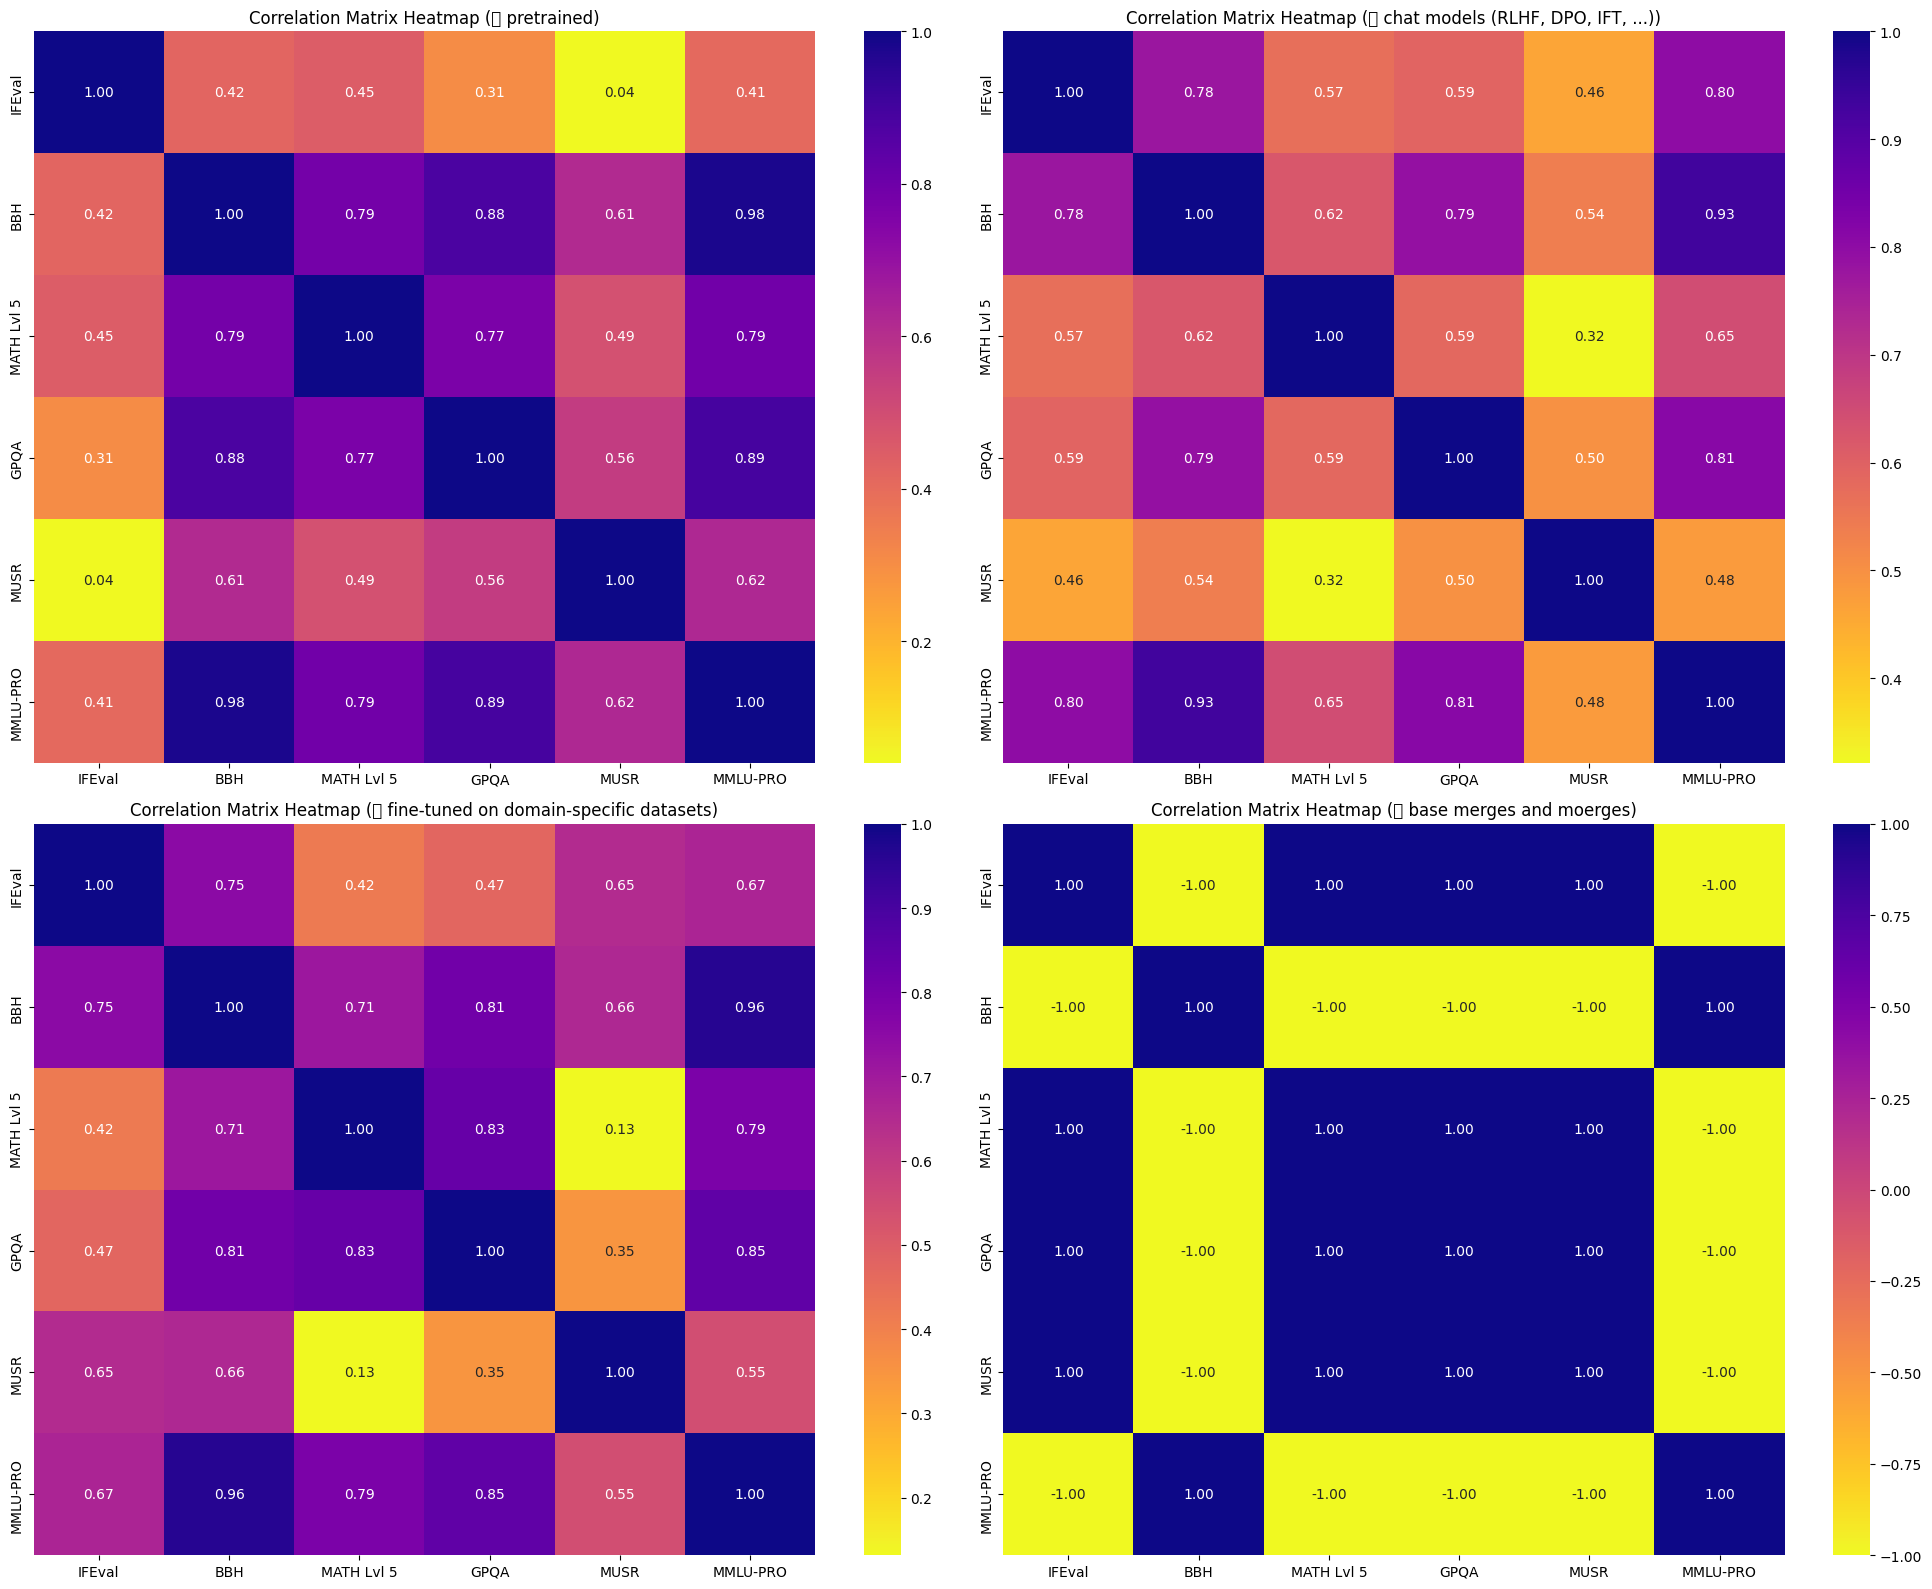

In [38]:
# Suppress missing font warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*missing from font.*")

model_types = data_v2['Type'].unique()
num_types = len(model_types)
rows = (num_types + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, 2, figsize=(20, rows * 8))

for i, model_type in enumerate(model_types):
    row = i // 2
    col = i % 2
    model_data = data_v2[data_v2['Type'] == model_type]
    correlation_matrix_model = model_data[tasks_v2].corr()
    
    sns.heatmap(correlation_matrix_model, annot=True, fmt=".2f", cmap='plasma_r', ax=axes[row, col])
    axes[row, col].set_title(f'Correlation Matrix Heatmap ({model_type})')

# If the number of plots is odd, remove the last empty subplot
if num_types % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

# Outlier Detection

In [24]:
# Calculate the mean score across all tasks for each model
data_v2['mean_score'] = data_v2[tasks_v2].mean(axis=1)
data_v2['mean_score'].head()

0    16.766858
1    19.628255
2     5.663939
3     4.748119
4     5.432974
Name: mean_score, dtype: float64

In [25]:
# Create a large figure to accommodate all plots
fig = px.scatter(data_frame=data_v2, x='mean_score', y=tasks_v2,
                 labels={"value": "Score by Task", "variable": "Task"},
                 title='Outlier Detection: Mean Score vs. Task Score',
                 color_discrete_sequence=colors,
                 opacity=0.7)

# Update axes labels
fig.update_xaxes(title_text='Mean Score (All Tasks)')
fig.update_yaxes(title_text='Score by Task')

# Add grid lines for better readability
fig.update_layout(grid=dict(columns=1, rows=1),
                  yaxis=dict(range=[-5, 100]),
                  xaxis=dict(range=[0, 50]),
                  width=800,
                  height=600,
)

# Show the plot
fig.show()

In [26]:
# Create a Figure for multiple plots
fig = go.Figure()

# Loop through each task to add a plot
for task, color in zip(tasks_v2, colors):
    # Calculate the rolling average
    sorted_data = data_v2.sort_values('mean_score')
    sorted_data[f'{task}_smooth'] = sorted_data[task].rolling(window=20, min_periods=1).mean()

    # Add a line plot for each task
    fig.add_trace(go.Scatter(x=sorted_data['mean_score'], y=sorted_data[f'{task}_smooth'], 
                             mode='lines', name=task, line=dict(color=color)))

# Update layout with titles and labels
fig.update_layout(
    title='Average Curves for Each Evaluation as Function of the Mean',
    xaxis_title='Mean Score (All Tasks)',
    yaxis_title='Average Score by Task',
    legend_title='Task',
    template="plotly",
    yaxis=dict(range=[-5, 100]),
    xaxis=dict(range=[0, 50]),
    width=800,
    height=600,
)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show()

In [27]:
# Define a function to highlight the maximum value in each column
def highlight_max(data, color='lightgreen'):
    attr = f'background-color: {color}'
    if data.ndim == 1:
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

# Find the best model for each task based on the maximum score for that task
best_models = data_v2.loc[data_v2[tasks_v2].idxmax()].sort_values(by="mean_score", 
                                                                  ascending = False)
best_models_unique = best_models.drop_duplicates(subset=['eval_name'])

styled_best_models = best_models_unique[['eval_name', 'mean_score'] + tasks_v2].style.apply(highlight_max, subset=tasks_v2)

styled_best_models